In [26]:
import numpy as np
import tensorflow as tf
from utils import *

In [27]:
def variance_extractor_smooth(data, num_samples):
    """
    Samples the local variance of a signal.

    data = 1d-numpy array of length timesteps
    num_samples = how many samples to extract
    """
    var_data = smooth(variance_filter(data,windowsize=100), windowsize=100, std=25)
    vmax = np.max(var_data)
    if(vmax == 0):
        vmax = 0.00001
    var_data = (var_data - np.mean(var_data))/vmax
    return sample(var_data, num_samples)

def variance_extractor_rough(data, num_samples):
    """
    Samples the local variance of a signal.

    data = 1d-numpy array of length timesteps
    num_samples = how many samples to extract
    """
    var_data = variance_filter(data,windowsize=100)
    vmax = np.max(var_data)
    if(vmax == 0):
        vmax = 0.00001
    var_data = (var_data - np.mean(var_data))/vmax
    return sample(var_data, num_samples)

In [28]:
def plot_sensor_info_for_label(sensor,label,n):
    df = pd.read_csv(data_path+"train.csv")
    count = 0
    for index, drow in df.iterrows():
        if drow['Label'] == label:
            count += 1
            
            data = pd.read_csv(data_path+drow['Datafile']).values
            
            fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,6))
            ax[0].set_title(drow['Subject']+", "+drow['Datafile'][20:31]+", "+label+",  "+sensors[sensor])
            ax[1].set_title("Variance spectrum and peaks")
            
            #ax[0].set_ylim(0,50000)
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
            
            xs = np.arange(0,data.shape[0])
            ax[0].plot(xs,data[:,sensor])
            
            info = variance_extractor_rough(data[:,sensor], 80)
            neu = variance_extractor_smooth(data[:,sensor], 80)
            #print(info)
            #vari = smooth(variance_filter(data[:,sensor],windowsize=100),100,25)
            #deriv = derivative_filter(data[:,sensor],windowsize=200, std=50)
            #peaks = signal.find_peaks(vari, height=None, width=20)
            #testres = peakfinder(deriv, None, 20, 3)
            #ax[1].scatter(peaks[0],vari[peaks[0]], c="r")
            #ax[1].plot(np.arange(0,vari.shape[0]),vari, c="g")
            #samples = [int(sample) for sample in np.linspace(0, vari.shape[0]-1, 80)]
            ax[1].scatter(np.linspace(0,info.shape[0]-1,80),info, c="g")
            ax[1].scatter(np.linspace(0,neu.shape[0]-1, 80),neu, c="red")
            #ax[1].scatter(peaks[0],deriv[peaks[0]], c="r")
            #ax[1].plot(np.arange(0,deriv.shape[0]),np.ones(deriv.shape[0])*np.mean(deriv), c="blue")
            #ax[1].plot(np.arange(0,deriv.shape[0]),deriv, c="g")
            #ax[1].set_ylim(-1,1)
            plt.show()
            if count == n:
                break

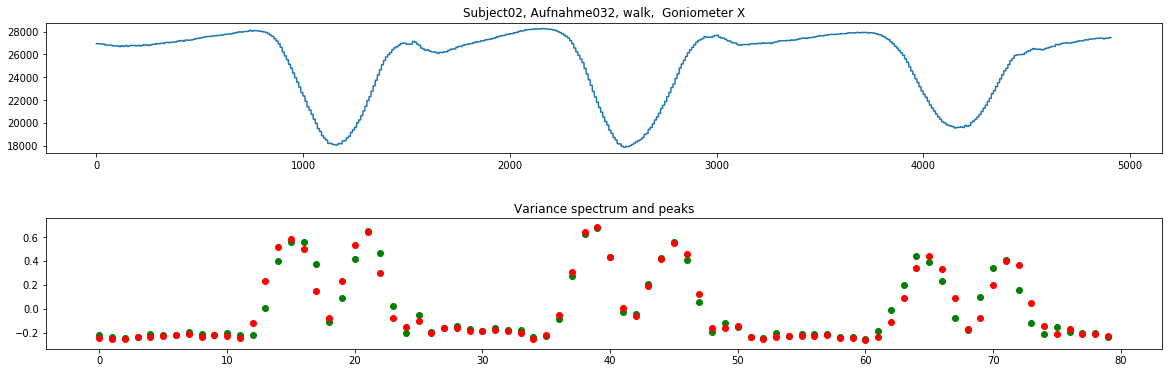

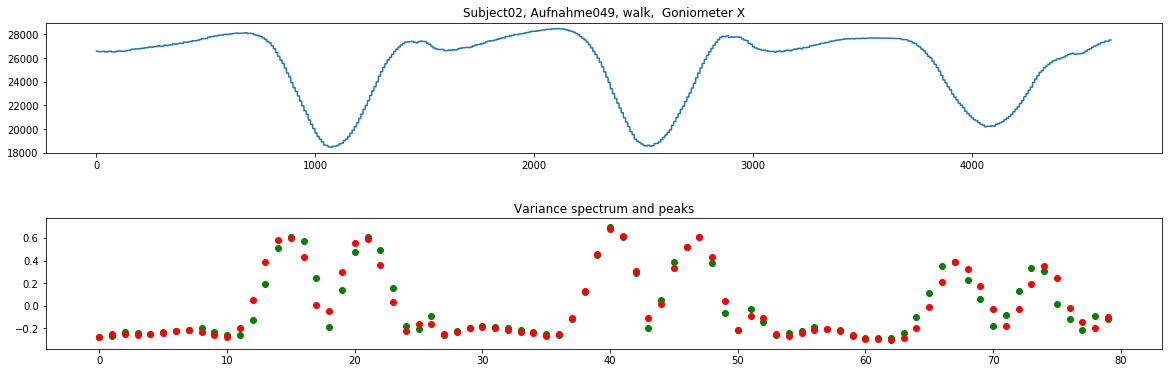

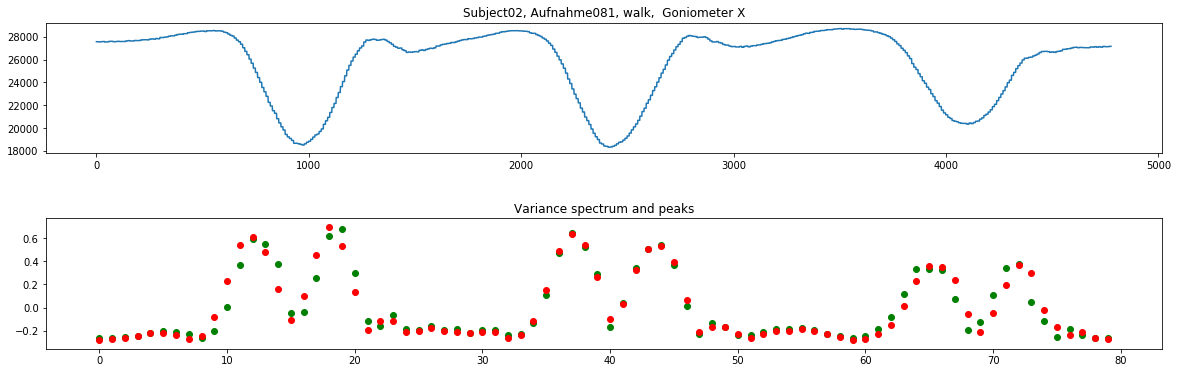

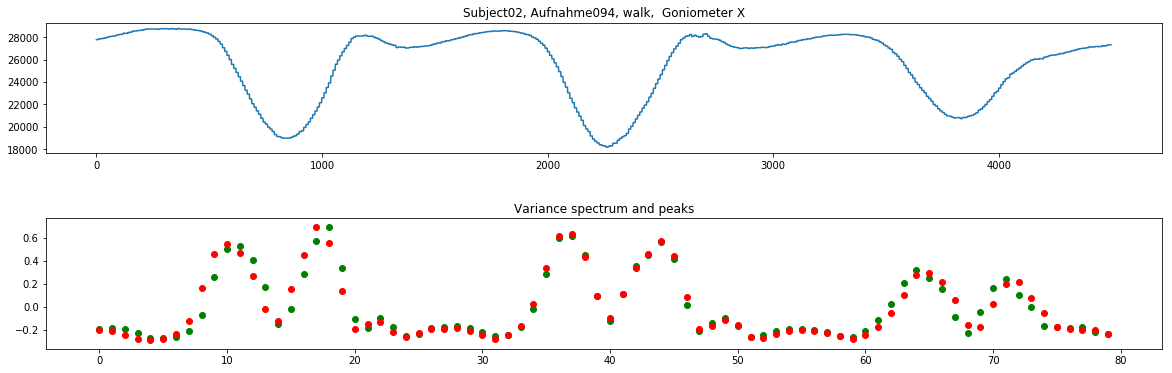

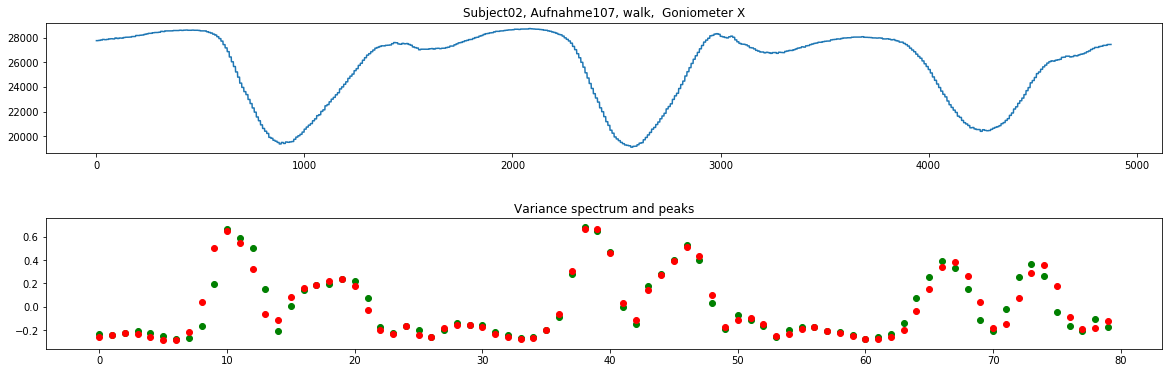

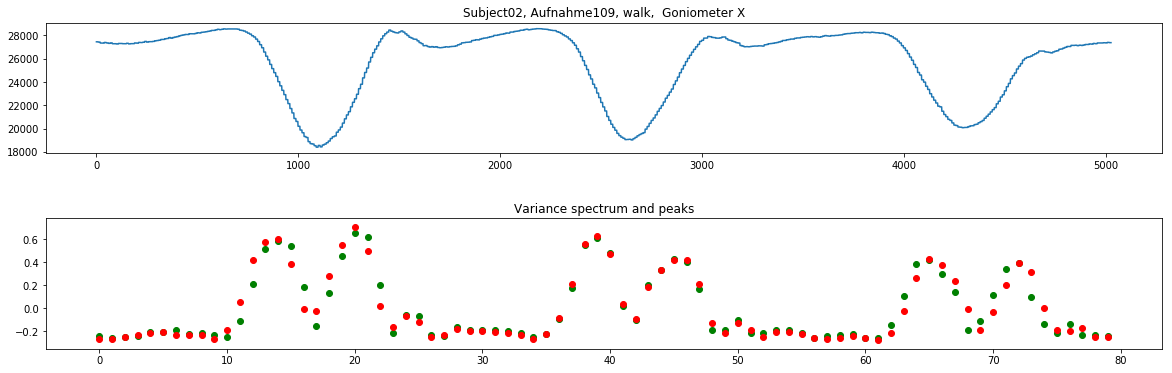

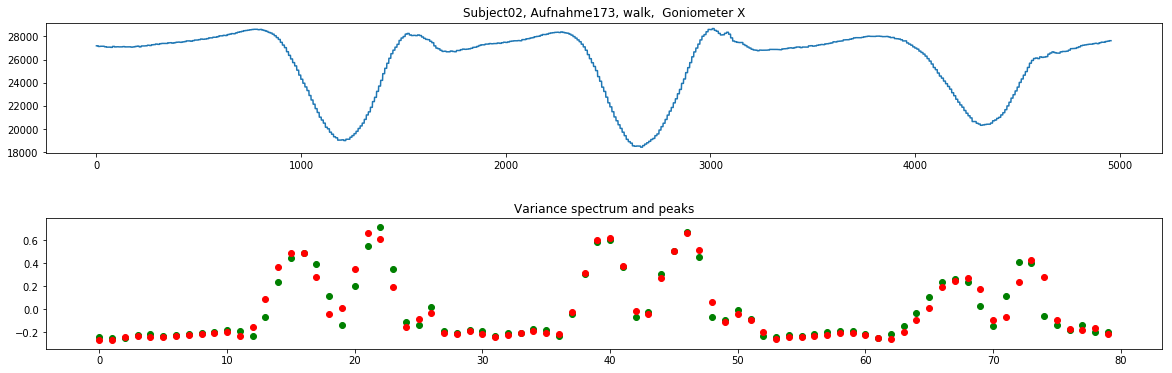

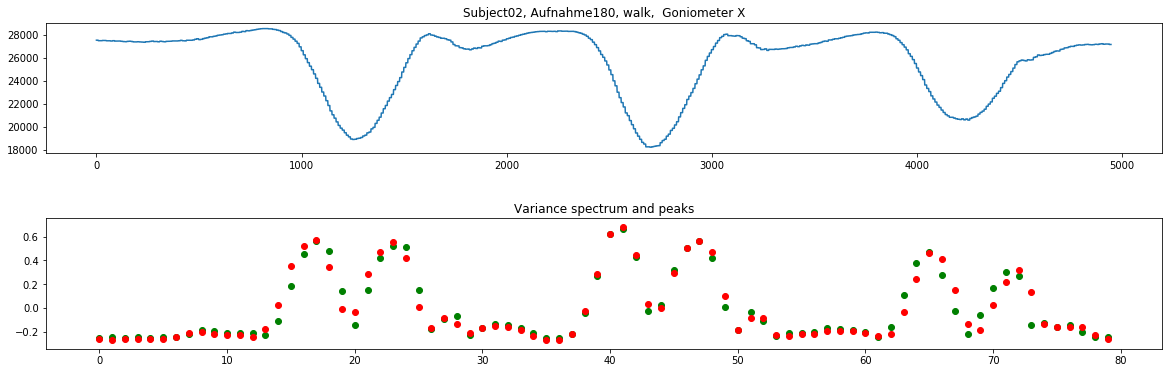

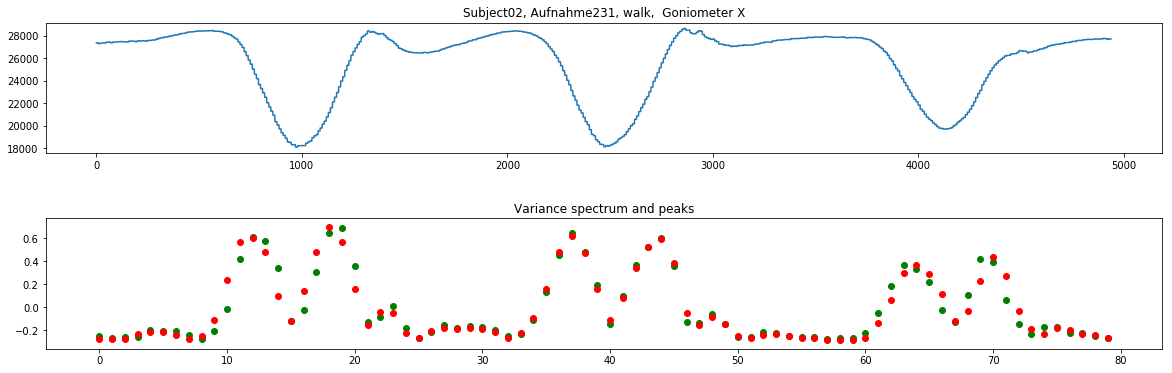

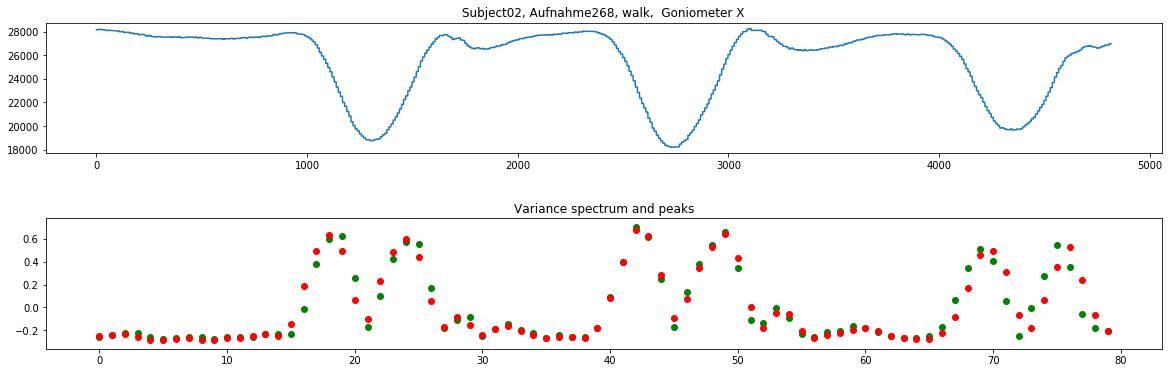

In [29]:
plot_sensor_info_for_label(sensors.index("Goniometer X"),"walk", 10)

In [ ]:
dataset_creator(data_path+"train.csv",
                "./data/hybrid/rawdata", recurrent_feature_extractor)

In [ ]:
challenge_dataset_creator(data_path+"challenge.csv",
                "./data/hybrid/rawchallenge", recurrent_feature_extractor)

In [ ]:
model_path = "/Users/thomasklein/Projects/BremenBigDataChallenge2019/bigdatachallenge/models/"
archive_path = model_path + "model_archive/"

name = "Bartimaeus"
model = tf.keras.models.load_model(archive_path+name+"lstm/"+name+".h5")
model.summary()

In [9]:
model_path = "/Users/thomasklein/Projects/BremenBigDataChallenge2019/bigdatachallenge/models/"
archive_path = model_path + "model_archive/"+"old_shit/"

name = "readout_lstm"
model = tf.keras.models.load_model(archive_path+name+"/"+name+".h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60)                19200     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1952      
_________________________________________________________________
dense_1 (Dense)              (None, 22)                726       
Total params: 21,878
Trainable params: 21,878
Non-trainable params: 0
_________________________________________________________________


In [2]:
dataset_creator(data_path+"train.csv",
                "./data/old_rawdata", old_feature_extractor)

Digesting Subject02/Subject02_Aufnahme000.csv
Digesting Subject02/Subject02_Aufnahme100.csv
Digesting Subject02/Subject02_Aufnahme200.csv
Digesting Subject02/Subject02_Aufnahme300.csv
Digesting Subject02/Subject02_Aufnahme400.csv
Digesting Subject03/Subject03_Aufnahme060.csv
Digesting Subject03/Subject03_Aufnahme160.csv
Digesting Subject03/Subject03_Aufnahme260.csv
Digesting Subject03/Subject03_Aufnahme360.csv
Digesting Subject04/Subject04_Aufnahme020.csv
Digesting Subject04/Subject04_Aufnahme120.csv
Digesting Subject04/Subject04_Aufnahme220.csv
Digesting Subject04/Subject04_Aufnahme320.csv
Digesting Subject04/Subject04_Aufnahme420.csv
Digesting Subject05/Subject05_Aufnahme082.csv
Digesting Subject05/Subject05_Aufnahme182.csv
Digesting Subject05/Subject05_Aufnahme282.csv
Digesting Subject05/Subject05_Aufnahme382.csv
lay not in known classes!
Digesting Subject06/Subject06_Aufnahme044.csv
lay not in known classes!
lay not in known classes!
lay not in known classes!
Digesting Subject06/Su

In [7]:
import pandas as pd
def get_ignore_list(file="/Users/thomasklein/Projects/BremenBigDataChallenge2019/bigdatachallenge/old_splits/rec_test.csv"):
    indices = []
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        path = row['Datafile']
        full = pd.read_csv(data_path+"train.csv")
        for idx2, row2 in full.iterrows():
            if( row2['Datafile'] == path):
                indices.append(idx2)
    return indices
                
indices = get_ignore_list()

In [8]:
print(indices)
print(len(indices))

[2881, 725, 4204, 1894, 2827, 574, 2187, 2310, 1223, 4106, 1360, 106, 1193, 2707, 3846, 2007, 1838, 5693, 4660, 5363, 1557, 3569, 776, 1586, 4716, 4417, 6182, 5597, 1024, 2441, 6069, 5296, 297, 3779, 5232, 4885, 67, 4076, 1370, 6139, 8, 900, 3833, 1747, 2738, 3843, 297, 4673, 4211, 2322, 2391, 3881, 1634, 297, 4920, 1904, 869, 1035, 5087, 5651, 1981, 1954, 421, 2429, 1706, 5883, 5937, 6215, 5980, 459, 1822, 673, 6134, 3925, 1829, 1393, 3765, 2017, 2717, 40, 4223, 3245, 3722, 5378, 4434, 1423, 471, 4699, 1871, 4991, 4419, 4584, 5970, 877, 5684, 631, 50, 260, 5874, 1207, 2123, 1352, 4679, 3904, 5884, 4058, 6090, 4483, 651, 5190, 451, 3169, 4145, 2801, 6175, 2185, 3708, 3623, 543, 36, 4407, 3160, 2769, 4791, 5873, 91, 1601, 5200, 4915, 4697, 5676, 1315, 1148, 993, 1557, 933, 1779, 2983, 1319, 5682, 2113, 2808, 5517, 3831, 1762, 474, 5429, 4634, 2642, 4641, 4207, 252, 908, 2152, 176, 5750, 6105, 5148, 3188, 436, 314, 5611, 2616, 4660, 4620, 4769, 2853, 3436, 3664, 238, 757, 852, 6317, 5717

In [ ]:
import pandas as pd
def get_ignore_list(file="/Users/thomasklein/Projects/BremenBigDataChallenge2019/bigdatachallenge/old_splits/rec_test.csv"):
    indices = []
    df = pd.read_csv(data_path)
    for idx, row in df.iterrows():
        path = row['Datafile']
        full = pd.read_csv(data_path+"train.csv")
        for idx2, row2 in full.iterrows():
            if( row2['Datafile'] == path):
                indices.append(idx2)
    return indices
                
indices = get_ignore_list()

In [10]:
challenge_dataset_creator(data_path+"challenge.csv",
                "./data/old/old_rawchallenge", old_feature_extractor)

Digesting Subject01/Subject01_Aufnahme000.csv
Digesting Subject01/Subject01_Aufnahme100.csv
Digesting Subject01/Subject01_Aufnahme200.csv
Digesting Subject01/Subject01_Aufnahme300.csv
Digesting Subject01/Subject01_Aufnahme400.csv
Digesting Subject10/Subject10_Aufnahme060.csv
Digesting Subject10/Subject10_Aufnahme160.csv
Digesting Subject10/Subject10_Aufnahme260.csv
Digesting Subject10/Subject10_Aufnahme360.csv
Digesting Subject14/Subject14_Aufnahme042.csv
Digesting Subject14/Subject14_Aufnahme142.csv
Digesting Subject14/Subject14_Aufnahme242.csv
Digesting Subject14/Subject14_Aufnahme342.csv
Digesting Subject15/Subject15_Aufnahme002.csv
Digesting Subject15/Subject15_Aufnahme102.csv
Digesting Subject15/Subject15_Aufnahme202.csv
Digesting Subject15/Subject15_Aufnahme302.csv
Digesting Subject15/Subject15_Aufnahme402.csv
